In [1]:
# Install libraries
!pip install prophet

In [2]:
!pip install yfinance

In [3]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import pandas as pd
import json
import os
from datetime import datetime
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [4]:
# import NASDAQ Composite data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = '^IXIC', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('NASDAQ.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,18046.439453,18091.960938,17863.380859,18074.519531,18074.519531,5347580000
2024-09-25,18050.359375,18155.039062,18040.619141,18082.210938,18082.210938,4858060000
2024-09-26,18327.339844,18327.339844,18071.740234,18190.289062,18190.289062,5669210000
2024-09-27,18228.779297,18238.279297,18069.179688,18119.589844,18119.589844,5367890000
2024-09-30,18069.830078,18198.160156,17997.560547,18189.169922,18189.169922,5846150000


In [5]:
# import AAPL stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'AAPL', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700
2024-09-27,228.460007,229.520004,227.300003,227.789993,227.789993,34026000
2024-09-30,230.039993,233.000000,229.649994,233.000000,233.000000,54541900


In [6]:
# import GOOGL stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'GOOGL', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('GOOGL.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,163.029999,163.220001,160.690002,162.289993,162.289993,23332100
2024-09-25,161.470001,162.809998,161.300003,161.490005,161.490005,18869200
2024-09-26,163.639999,164.080002,162.279999,162.729996,162.729996,20319300
2024-09-27,162.809998,165.699997,162.630005,163.949997,163.949997,21101300
2024-09-30,163.320007,166.149994,163.259995,165.850006,165.850006,20413900


In [7]:
# import MSFT stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'MSFT', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,433.000000,433.350006,426.100006,429.170013,429.170013,17015800
2024-09-25,429.829987,433.119995,428.570007,432.109985,432.109985,13396400
2024-09-26,435.089996,435.299988,429.130005,431.309998,431.309998,14492000
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300


In [8]:
# import META (Facebook) stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'META', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('META.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,566.679993,567.750000,554.190002,563.330017,563.330017,12993000
2024-09-25,564.049988,576.880005,563.719971,568.309998,568.309998,16543400
2024-09-26,575.729980,577.400024,562.349976,567.840027,567.840027,14400800
2024-09-27,570.099976,570.840027,564.510010,567.359985,567.359985,9398400
2024-09-30,567.700012,574.679993,564.799988,572.440002,572.440002,12792300


In [9]:
# Import Data
apple_path = Path("AAPL.csv")
google_path = Path("GOOGL.csv")
microsoft_path = Path("MSFT.csv")
facebook_path = Path("META.csv")
sp500_path = Path("sp500.csv")
nasdaq_path = Path("NASDAQ.csv")

In [10]:
# Read stock data and index by date
apple_data = pd.read_csv(apple_path, index_col="Date", parse_dates=True)
google_data = pd.read_csv(google_path, index_col="Date", parse_dates=True)
microsoft_data = pd.read_csv(microsoft_path, index_col="Date", parse_dates=True)
facebook_data = pd.read_csv(facebook_path, index_col="Date", parse_dates=True)
sp500_data = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)
nasdaq_data = pd.read_csv(nasdaq_path, index_col="Date", parse_dates=True)

In [11]:
# Slice Apple data from 2018-01-01 to 2024-10-01
apple_data_2018_2024 = apple_data.loc['2018-01-01':'2024-10-01']
apple_data_2018_2024


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568932,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561859,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750275,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214230,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061142,82271200
...,...,...,...,...,...,...
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700


In [12]:
# Total number of data points
apple_data_2018_2024.shape[0]

1697

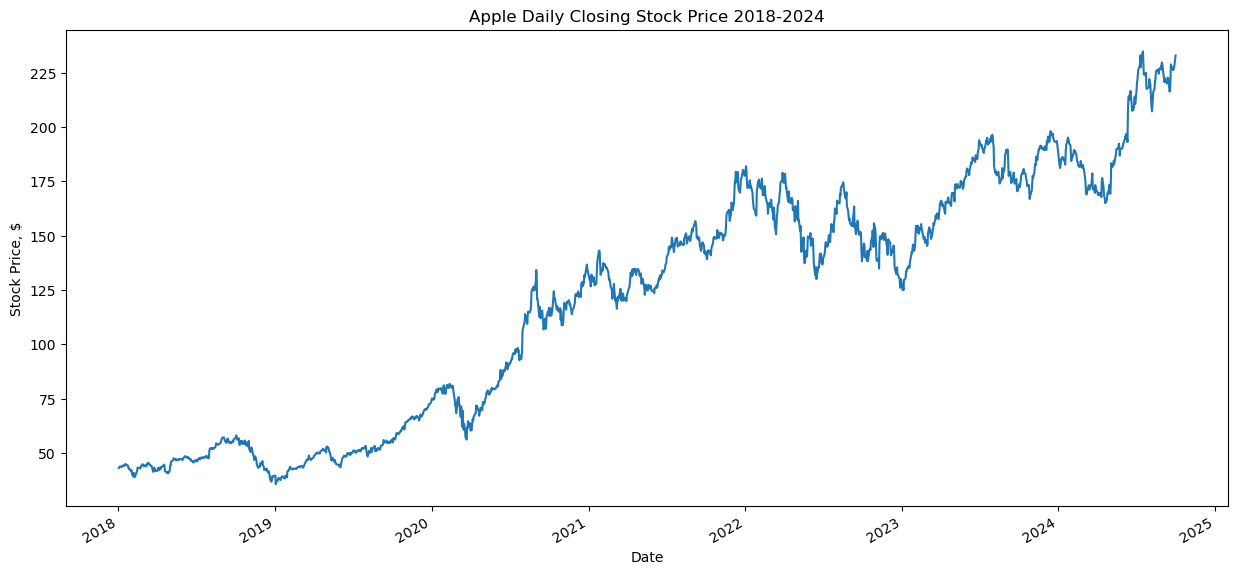

In [13]:
# Plot the closing prices of Apple from 2018-01-01 to 2024-10-01
apple_data_2018_2024['Close'].plot(title='Apple Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [14]:
# Slice Google data from 2018-01-01 to 2024-10-01
google_data_2018_2024 = google_data.loc['2018-01-01':'2024-10-01']
google_data_2018_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.651001,53.799000,52.651001,53.660500,53.527958,31766000
2018-01-03,53.696499,54.805000,53.671501,54.576000,54.441196,31318000
2018-01-04,54.854500,55.203999,54.713001,54.787998,54.652668,26052000
2018-01-05,55.172501,55.679001,55.090000,55.514500,55.377377,30250000
2018-01-08,55.549999,55.958000,55.500000,55.710499,55.572891,24644000
...,...,...,...,...,...,...
2024-09-24,163.029999,163.220001,160.690002,162.289993,162.289993,23332100
2024-09-25,161.470001,162.809998,161.300003,161.490005,161.490005,18869200
2024-09-26,163.639999,164.080002,162.279999,162.729996,162.729996,20319300


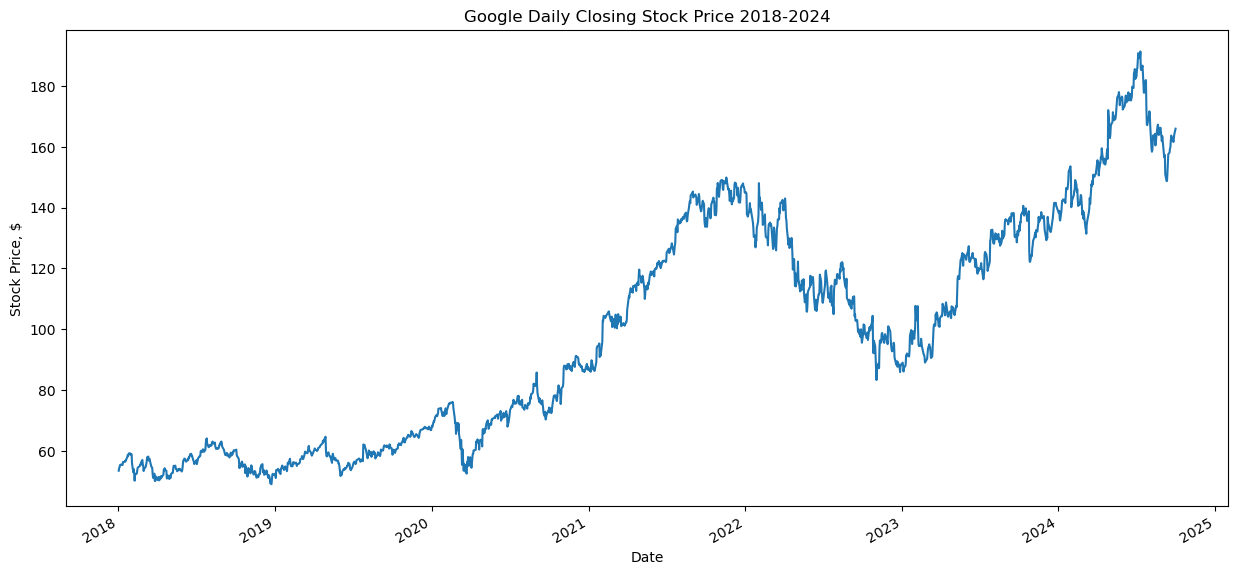

In [15]:
# Plot the closing prices of Google from 2018-01-01 to 2024-10-01
google_data_2018_2024['Close'].plot(title='Google Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [16]:
# Slice Microsoft data from 2018-01-01 to 2024-10-01
microsoft_data_2018_2024 = microsoft_data.loc['2018-01-01':'2024-10-01']
microsoft_data_2018_2024


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,79.792900,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,80.164253,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,80.869797,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,81.872452,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,81.956017,22113000
...,...,...,...,...,...,...
2024-09-24,433.000000,433.350006,426.100006,429.170013,429.170013,17015800
2024-09-25,429.829987,433.119995,428.570007,432.109985,432.109985,13396400
2024-09-26,435.089996,435.299988,429.130005,431.309998,431.309998,14492000


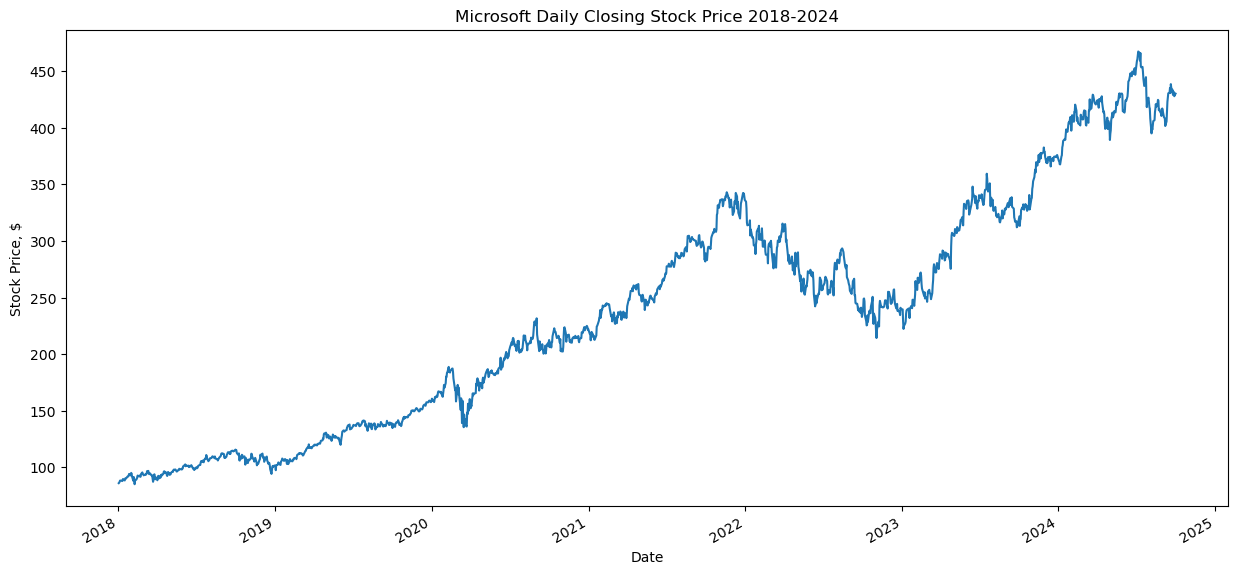

In [17]:
# Plot the closing prices of Microsoft from 2018-01-01 to 2024-10-01
microsoft_data_2018_2024['Close'].plot(title='Microsoft Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [18]:
# Slice Facebook/META data from 2018-01-01 to 2024-10-01
facebook_data_2018_2024 = facebook_data.loc['2018-01-01':'2024-10-01']
facebook_data_2018_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,180.875412,18151900
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.115662,16886600
2018-01-04,184.899994,186.210007,184.100006,184.330002,183.776672,13880900
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.289108,13574500
2018-01-08,187.199997,188.899994,186.330002,188.279999,187.714813,17994700
...,...,...,...,...,...,...
2024-09-24,566.679993,567.750000,554.190002,563.330017,563.330017,12993000
2024-09-25,564.049988,576.880005,563.719971,568.309998,568.309998,16543400
2024-09-26,575.729980,577.400024,562.349976,567.840027,567.840027,14400800


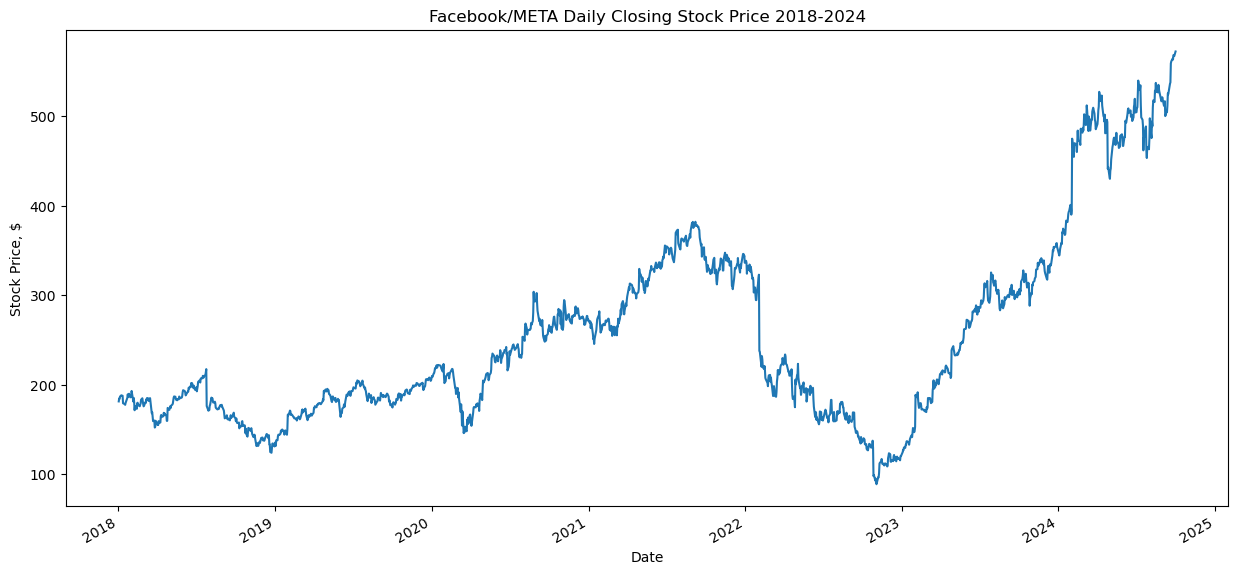

In [19]:
# Plot the closing prices of Facebook/META from 2018-01-01 to 2024-10-01
facebook_data_2018_2024['Close'].plot(title='Facebook/META Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [20]:
# Slice NASDAQ data from 2018-01-01 to 2024-10-01
nasdaq_data_2018_2024 = nasdaq_data.loc['2018-01-01':'2024-10-01']
nasdaq_data_2018_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,6937.649902,7006.910156,6924.080078,7006.899902,7006.899902,1929700000
2018-01-03,7017.069824,7069.149902,7016.700195,7065.529785,7065.529785,2173130000
2018-01-04,7089.500000,7098.049805,7072.379883,7077.910156,7077.910156,2103220000
2018-01-05,7105.740234,7137.040039,7097.080078,7136.560059,7136.560059,2024000000
2018-01-08,7135.379883,7161.350098,7124.089844,7157.390137,7157.390137,2055010000
...,...,...,...,...,...,...
2024-09-24,18046.439453,18091.960938,17863.380859,18074.519531,18074.519531,5347580000
2024-09-25,18050.359375,18155.039062,18040.619141,18082.210938,18082.210938,4858060000
2024-09-26,18327.339844,18327.339844,18071.740234,18190.289062,18190.289062,5669210000


In [21]:
# Rename S&P500 column to Close
sp500_data = sp500_data.rename(columns={"S&P500": "Close"})

In [22]:
# Slice S&P 500 data from 2018-01-01 to 2024-10-01
sp500_data_2018_2024 = sp500_data.loc['2018-01-01':'2024-10-01']
sp500_data_2018_2024

,Close
Date,
2018-01-02,2695.81
2018-01-03,2713.06
2018-01-04,2723.99
2018-01-05,2743.15
2018-01-08,2747.71
...,...
2024-09-25,5722.26
2024-09-26,5745.37
2024-09-27,5738.17


<Axes: title={'center': 'S&P 500 Index Closing Value 2018-2024'}, xlabel='Date'>

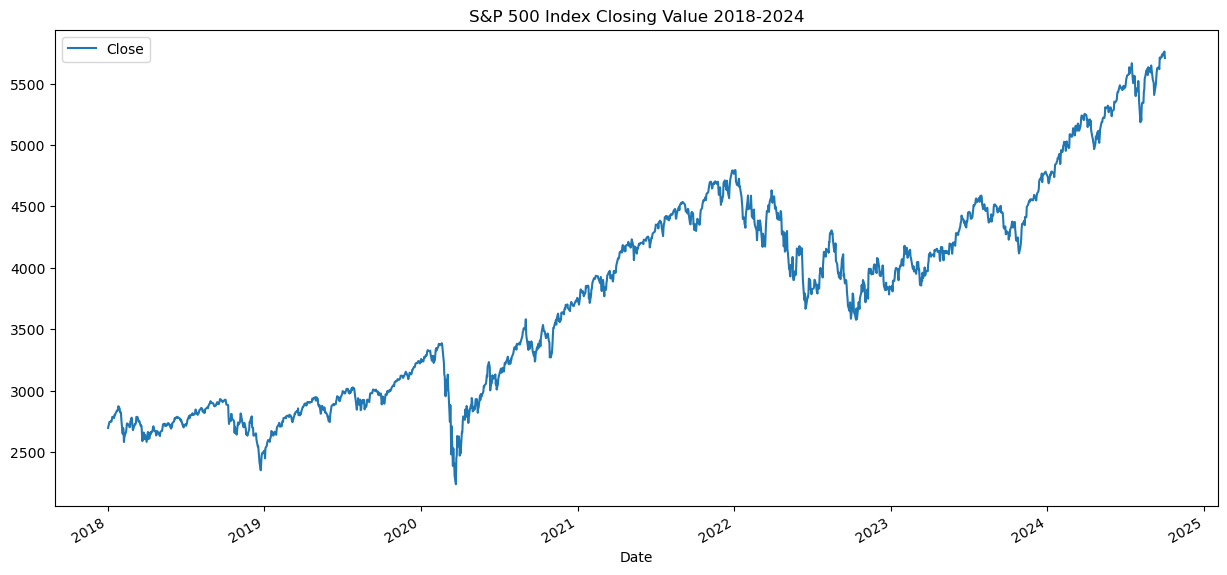

In [23]:
# Plot the closing value of S&P 500 stock index
sp500_data_2018_2024.plot(title="S&P 500 Index Closing Value 2018-2024", figsize=(15,7))


In [24]:
# Join by Columns and add stock tocker as the key
joined_data_cols = pd.concat([apple_data_2018_2024, google_data_2018_2024, microsoft_data_2018_2024, facebook_data_2018_2024, sp500_data_2018_2024, nasdaq_data_2018_2024], axis="columns", join="inner", keys=["AAPL", "GOOGL", "MSFT", "FB", "S&P 500", "NASDAQ"])
joined_data_cols

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   40.568932   
2018-01-03   43.132500   43.637501   42.990002   43.057499   40.561859   
2018-01-04   43.134998   43.367500   43.020000   43.257500   40.750275   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.214230   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.061142   
...                ...         ...         ...         ...         ...   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228.460007  229.520004  227.300003  227.789993  227.789993   
2024-09-30  230.039993  233.000000  229.649994  233.000000  233.000000   

                            GOOGL                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2018-01-02  102223600   52.651001   53.799000   52.651001   53.660500  ...   
2018-01-03  118071600   53.696499   54.805000   53.671501   54.576000  ...   
2018-01-04   89738400   54.854500   55.203999   54.713001   54.787998  ...   
2018-01-05   94640000   55.172501   55.679001   55.090000   55.514500  ...   
2018-01-08   82271200   55.549999   55.958000   55.500000   55.710499  ...   
...               ...         ...         ...         ...         ...  ...   
2024-09-24   43556100  163.029999  163.220001  160.690002  162.289993  ...   
2024-09-25   42308700  161.470001  162.809998  161.300003  161.490005  ...   
2024-09-26   36636700  163.639999  164.080002  162.279999  162.729996  ...   
2024-09-27   34026000  162.809998  165.699997  162.630005  163.949997  ...   
2024-09-30   54541900  163.320007  166.149994  163.259995  165.850006  ...   

                    FB                        S&P 500        NASDAQ  \
                 Close   Adj Close    Volume    Close          Open   
Date                                                                  
2018-01-02  181.419998  180.875412  18151900  2695.81   6937.649902   
2018-01-03  184.669998  184.115662  16886600  2713.06   7017.069824   
2018-01-04  184.330002  183.776672  13880900  2723.99   7089.500000   
2018-01-05  186.850006  186.289108  13574500  2743.15   7105.740234   
2018-01-08  188.279999  187.714813  17994700  2747.71   7135.379883   
...                ...         ...       ...      ...           ...   
2024-09-24  563.330017  563.330017  12993000  5732.93  18046.439453   
2024-09-25  568.309998  568.309998  16543400  5722.26  18050.359375   
2024-09-26  567.840027  567.840027  14400800  5745.37  18327.339844   
2024-09-27  567.359985  567.359985   9398400  5738.17  18228.779297   
2024-09-30  572.440002  572.440002  12792300  5762.48  18069.830078   

                                                                                
                    High           Low         Close     Adj Close      Volume  
Date                                                                            
2018-01-02   7006.910156   6924.080078   7006.899902   7006.899902  1929700000  
2018-01-03   7069.149902   7016.700195   7065.529785   7065.529785  2173130000  
2018-01-04   7098.049805   7072.379883   7077.910156   7077.910156  2103220000  
2018-01-05   7137.040039   7097.080078   7136.560059   7136.560059  2024000000  
2018-01-08   7161.350098   7124.089844   7157.390137   7157.390137  2055010000  
...                  ...           ...           ...           ...         ...  
2024-09-24  18091.960938  17863.380859  18074.519531  18074.519531  5347580000  
2024-09-25  18155.039062  18040.619141  18082.210938  18082.210938  4858060000  
20

In [25]:
# Select only closing prices and volume for each stock
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_2018_2024 = closing_prices.loc["2018-01-01":"2024-09-30"]
closing_prices_2018_2024


,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2018-01-02,43.064999,53.660500,85.949997,181.419998,2695.81,7006.899902
2018-01-03,43.057499,54.576000,86.349998,184.669998,2713.06,7065.529785
2018-01-04,43.257500,54.787998,87.110001,184.330002,2723.99,7077.910156
2018-01-05,43.750000,55.514500,88.190002,186.850006,2743.15,7136.560059
2018-01-08,43.587502,55.710499,88.279999,188.279999,2747.71,7157.390137
...,...,...,...,...,...,...
2024-09-24,227.369995,162.289993,429.170013,563.330017,5732.93,18074.519531
2024-09-25,226.369995,161.490005,432.109985,568.309998,5722.26,18082.210938


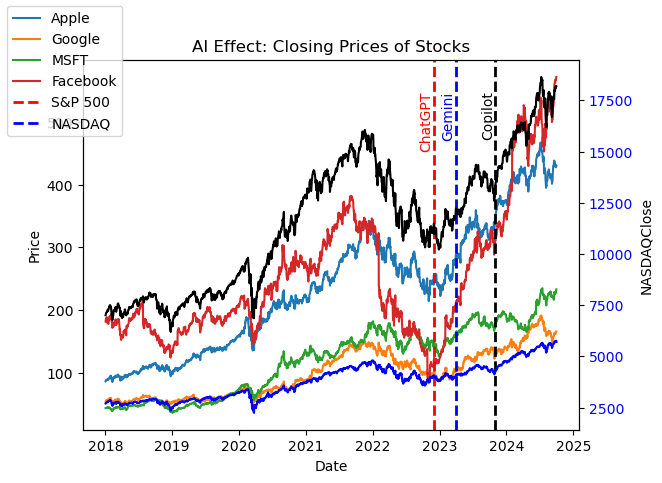

In [115]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the closing prices of the stocks on left y-axis
ax1.plot(microsoft_data_2018_2024['Close'], label=["MSFT"])
ax1.plot(google_data_2018_2024['Close'], label=["Google"])
ax1.plot(apple_data_2018_2024['Close'], label=["Apple"])
ax1.plot(facebook_data_2018_2024['Close'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis="y")

# Draw a verticle line for release of ChatGPT 2022-11-30 (Red Line)
date_value = pd.to_datetime('2022-11-30')
ax1.axvline(date_value, color='r', linestyle='--', lw=2)
# Add text annotation for ChatGPT
ax1.text(date_value, 550, "ChatGPT", color='r', rotation=90, ha='right', va='top')

# Draw a verticle line for release of Gemini (2023-03-30) (Blue Line)
date_value = pd.to_datetime('2023-03-30')
ax1.axvline(date_value, color='b', linestyle='--', lw=2)
# Add text annotation for ChatGPT
ax1.text(date_value, 550, "Gemini", color='b', rotation=90, ha='right', va='top')

# Draw a verticle line for release of Copilot+ (2023-11-01) (Black Line)
date_value = pd.to_datetime('2023-11-01')
ax1.axvline(date_value, color='black', linestyle='--', lw=2)
# Add text annotation for ChatGPT
ax1.text(date_value, 550, "Copilot", color='black', rotation=90, ha='right', va='top')

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()

# Plot the S&P 500 on the right y-axis
ax2.plot(sp500_data_2018_2024['Close'], color="b", label="S&P 500")
ax2.plot(nasdaq_data_2018_2024['Close'], color="black", label="NASDAQ")
ax2.set_ylabel("S&P500" + "Close", color="b")
ax2.set_ylabel("NASDAQ" + "Close", color="black")
ax2.tick_params(axis="y", labelcolor="b")

# Show the plot
plt.title("AI Effect: Closing Prices of Stocks")
fig.legend(["Apple", "Google", "MSFT", "Facebook", "S&P 500", "NASDAQ"], loc="upper left")
plt.show()

In [27]:
# Calculate total returns for each stock from 2018-01-01 to 2024-09-30
start_prices = closing_prices_2018_2024.iloc[0]
end_prices = closing_prices_2018_2024.iloc[-1]
total_returns = ((end_prices - start_prices)/start_prices)*100
total_returns


AAPL     Close    441.042627
GOOGL    Close    209.072795
MSFT     Close    400.639910
FB       Close    215.533022
S&P 500  Close    113.756904
NASDAQ   Close    159.589407
dtype: float64

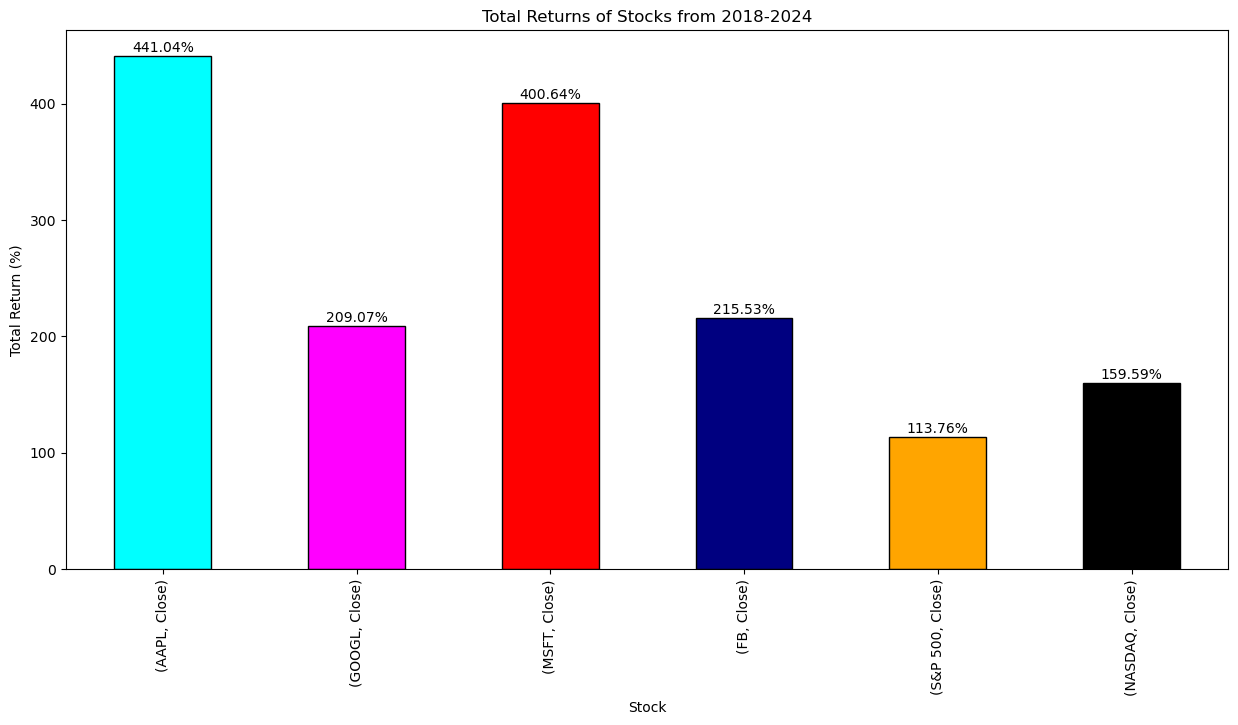

In [28]:
# Chart histogram of total returns
colors = ["cyan", "magenta", "red", "navy", "orange", "black"]
total_returns.plot(kind="bar", title="Total Returns of Stocks from 2018-2024", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Total Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(total_returns):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')

# Show the plot
plt.show()

In [29]:
# Calculate annualized average return for each stock from 2018-01-01 to 2024-09-30

annualized_returns = (closing_prices_2018_2024.pct_change().mean())*252*100
annualized_returns

AAPL     Close    29.882271
GOOGL    Close    21.534390
MSFT     Close    28.192786
FB       Close    26.201640
S&P 500  Close    13.287790
NASDAQ   Close    17.043380
dtype: float64

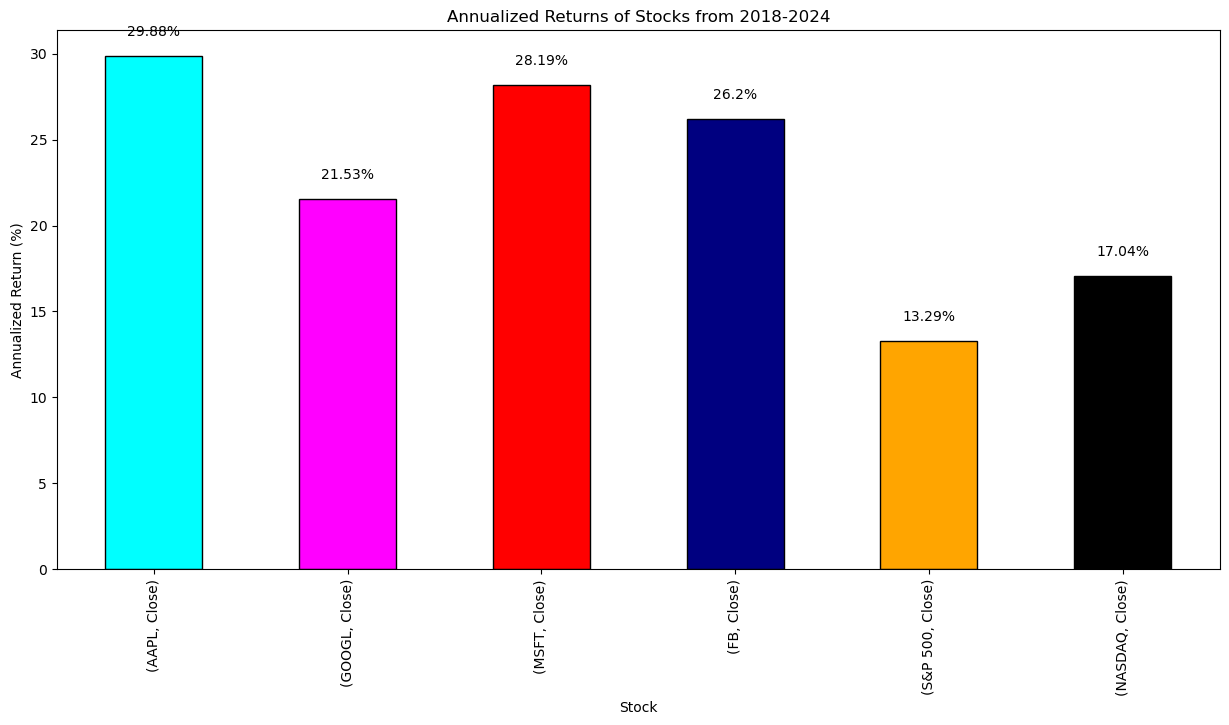

In [30]:
# Chart histogram of total returns
colors = ["cyan", "magenta", "red", "navy", "orange", "black"]
annualized_returns.plot(kind="bar", title="Annualized Returns of Stocks from 2018-2024", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Annualized Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(annualized_returns):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')
plt.show()

In [31]:
# Closing prices of all 4 stocks since 2023-03-31 (launch of Gemini - Google's AI bot)
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_AI = closing_prices.loc["2023-03-31":"2024-09-30"]
closing_prices_AI

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2023-03-31,164.899994,103.730003,288.299988,211.940002,4109.31,12221.910156
2023-04-03,166.169998,104.360001,287.230011,213.070007,4124.51,12189.450195
2023-04-04,165.630005,104.720001,287.179993,214.720001,4100.60,12126.330078
2023-04-05,163.759995,104.470001,284.339996,211.479996,4090.38,11996.860352
2023-04-06,164.660004,108.419998,291.600006,216.100006,4105.02,12087.959961
...,...,...,...,...,...,...
2024-09-24,227.369995,162.289993,429.170013,563.330017,5732.93,18074.519531
2024-09-25,226.369995,161.490005,432.109985,568.309998,5722.26,18082.210938


In [32]:
# Closing value of NASDAQ Composite from 2023-03-31 to 2024-10-01
nasdaq_data_AI = nasdaq_data.loc['2023-03-31':'2024-10-01']
nasdaq_data_AI

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,12031.540039,12227.929688,12030.440430,12221.910156,12221.910156,5521150000
2023-04-03,12146.089844,12196.339844,12086.519531,12189.450195,12189.450195,4816440000
2023-04-04,12208.490234,12224.679688,12081.809570,12126.330078,12126.330078,4298760000
2023-04-05,12081.759766,12086.750000,11931.849609,11996.860352,11996.860352,4378590000
2023-04-06,11939.080078,12098.500000,11898.360352,12087.959961,12087.959961,3862800000
...,...,...,...,...,...,...
2024-09-24,18046.439453,18091.960938,17863.380859,18074.519531,18074.519531,5347580000
2024-09-25,18050.359375,18155.039062,18040.619141,18082.210938,18082.210938,4858060000
2024-09-26,18327.339844,18327.339844,18071.740234,18190.289062,18190.289062,5669210000


In [33]:
# Closing value of S&P 500 index from 2023-03-31 to 2024-10-01
sp500_data_AI = sp500_data.loc['2023-03-31':'2024-10-01']
sp500_data_AI

,Close
Date,
2023-03-31,4109.31
2023-04-03,4124.51
2023-04-04,4100.60
2023-04-05,4090.38
2023-04-06,4105.02
...,...
2024-09-25,5722.26
2024-09-26,5745.37
2024-09-27,5738.17


In [34]:
# Individual closing prices of all 4 stocks since 2023-03-31 (launch of Gemini - Google's AI bot)
apple_data_AI = apple_data.loc['2023-03-31':'2024-10-01']
google_data_AI = google_data.loc['2023-03-31':'2024-10-01']
microsoft_data_AI = microsoft_data.loc['2023-03-31':'2024-10-01']
facebook_data_AI = facebook_data.loc['2023-03-31':'2024-10-01']

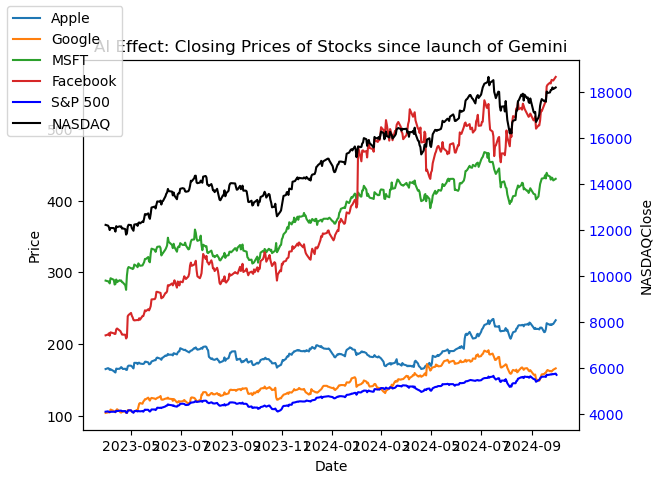

In [35]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the closing prices of the stocks on left y-axis
ax1.plot(apple_data_AI['Close'], label=["MSFT"])
ax1.plot(google_data_AI['Close'], label=["Google"])
ax1.plot(microsoft_data_AI['Close'], label=["Apple"])
ax1.plot(facebook_data_AI['Close'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis="y")

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()

# Plot the S&P 500 on the right y-axis
ax2.plot(sp500_data_AI, color="b", label="S&P 500")
ax2.plot(nasdaq_data_AI['Close'], color="black", label="NASDAQ")
ax2.set_ylabel("S&P500" + "Close", color="b")
ax2.set_ylabel("NASDAQ" + "Close", color="black")
ax2.tick_params(axis="y", labelcolor="b")

# Show the plot
plt.title("AI Effect: Closing Prices of Stocks since launch of Gemini")
fig.legend(["Apple", "Google", "MSFT", "Facebook", "S&P 500", "NASDAQ"], loc="upper left")
plt.show()

In [36]:
# Return on all 4 stocks vs S&P 500 since 2023-03-31 (launch of Gemini - Google's AI bot)
start_prices = closing_prices_AI.iloc[0]
end_prices = closing_prices_AI.iloc[-1]
total_returns_AI = ((end_prices - start_prices)/start_prices)*100
total_returns_AI

AAPL     Close     41.297761
GOOGL    Close     59.886244
MSFT     Close     49.254251
FB       Close    170.095308
S&P 500  Close     40.229868
NASDAQ   Close     48.824281
dtype: float64

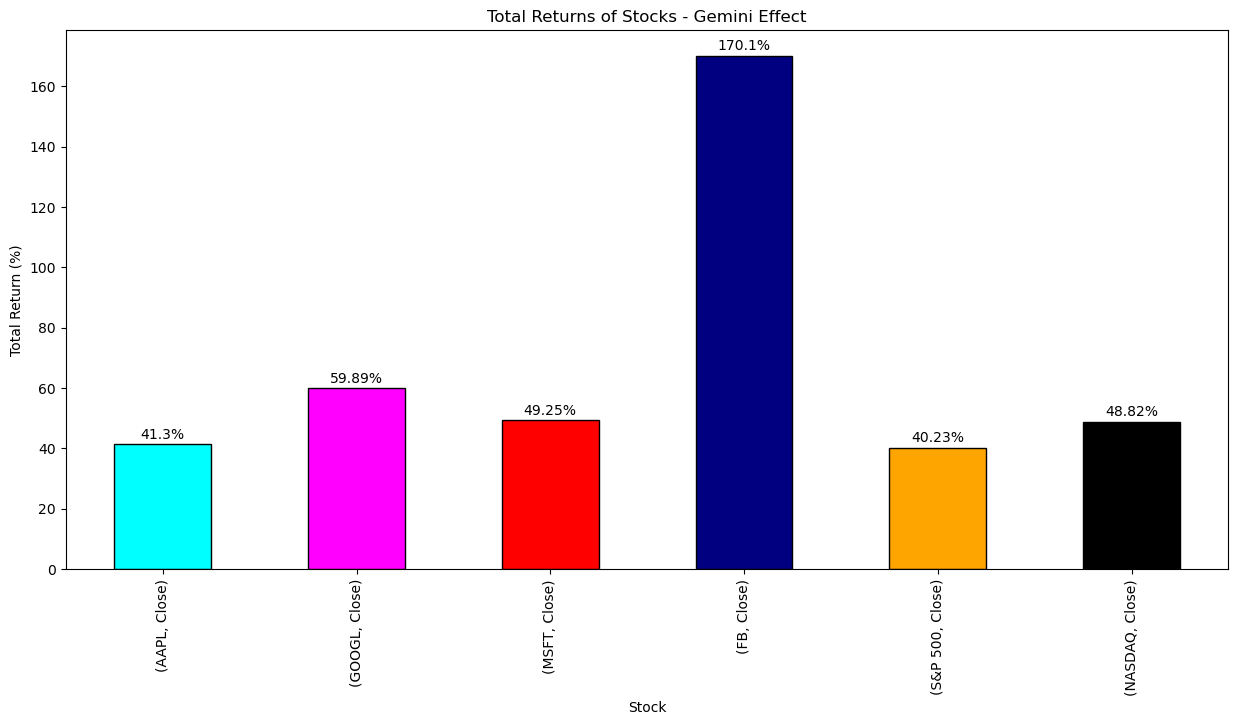

In [37]:
# Histogram of returns since launch of Gemini (2023-03-31)
colors = ["cyan", "magenta", "red", "navy", "orange", "black"]
total_returns_AI.plot(kind="bar", title="Total Returns of Stocks - Gemini Effect", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Total Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(total_returns_AI):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')
plt.show()

In [38]:
# Closing prices of all 4 stocks since 2023-11-01 (launch of Copilot+ - Microsoft's AI bot)
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_AI2 = closing_prices.loc["2023-11-01":"2024-09-30"]
closing_prices_AI2

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2023-11-01,173.970001,126.449997,346.070007,311.850006,4237.86,13061.469727
2023-11-02,177.570007,127.489998,348.320007,310.869995,4317.78,13294.190430
2023-11-03,176.649994,129.100006,352.799988,314.600006,4358.34,13478.280273
2023-11-06,179.229996,130.250000,356.529999,315.799988,4365.98,13518.780273
2023-11-07,181.820007,130.970001,360.529999,318.820007,4378.38,13639.860352
...,...,...,...,...,...,...
2024-09-24,227.369995,162.289993,429.170013,563.330017,5732.93,18074.519531
2024-09-25,226.369995,161.490005,432.109985,568.309998,5722.26,18082.210938


In [39]:
apple_data_AI2 = apple_data.loc['2023-11-01':'2024-10-01']
google_data_AI2 = google_data.loc['2023-11-01':'2024-10-01']
microsoft_data_AI2 = microsoft_data.loc['2023-11-01':'2024-10-01']
facebook_data_AI2 = facebook_data.loc['2023-11-01':'2024-10-01']

In [40]:
# Closing value of NASDAQ Composite from 2023-11-01 to 2024-10-01
nasdaq_data_AI2 = nasdaq_data.loc['2023-11-01':'2024-10-01']
nasdaq_data_AI2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,12887.059570,13072.419922,12875.200195,13061.469727,13061.469727,4545120000
2023-11-02,13230.490234,13302.179688,13177.639648,13294.190430,13294.190430,4962950000
2023-11-03,13362.849609,13520.280273,13344.730469,13478.280273,13478.280273,4918750000
2023-11-06,13514.080078,13551.620117,13435.990234,13518.780273,13518.780273,4345850000
2023-11-07,13555.790039,13675.459961,13516.559570,13639.860352,13639.860352,4354460000
...,...,...,...,...,...,...
2024-09-24,18046.439453,18091.960938,17863.380859,18074.519531,18074.519531,5347580000
2024-09-25,18050.359375,18155.039062,18040.619141,18082.210938,18082.210938,4858060000
2024-09-26,18327.339844,18327.339844,18071.740234,18190.289062,18190.289062,5669210000


In [41]:
# Closing value of S&P 500 index from 2023-11-01 to 2024-10-01
sp500_data_AI2 = sp500_data.loc['2023-11-01':'2024-10-01']
sp500_data_AI2

,Close
Date,
2023-11-01,4237.86
2023-11-02,4317.78
2023-11-03,4358.34
2023-11-06,4365.98
2023-11-07,4378.38
...,...
2024-09-25,5722.26
2024-09-26,5745.37
2024-09-27,5738.17


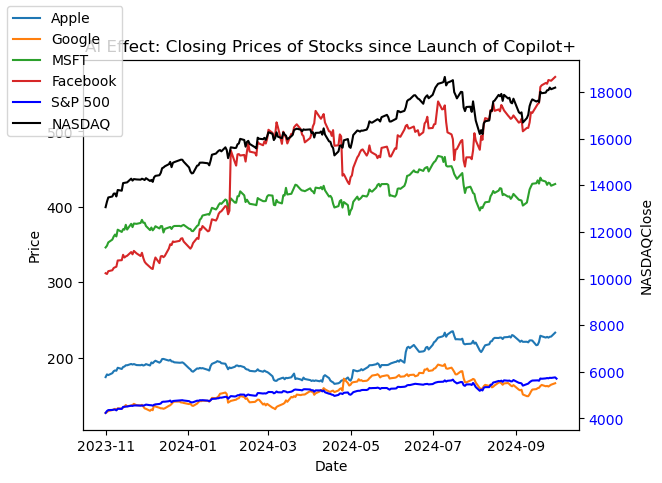

In [42]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the closing prices of the stocks on left y-axis
ax1.plot(apple_data_AI2['Close'], label=["MSFT"])
ax1.plot(google_data_AI2['Close'], label=["Google"])
ax1.plot(microsoft_data_AI2['Close'], label=["Apple"])
ax1.plot(facebook_data_AI2['Close'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis="y")

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()

# Plot the S&P 500 on the right y-axis
ax2.plot(sp500_data_AI2, color="b", label="S&P 500")
ax2.plot(nasdaq_data_AI2['Close'], color="black", label="NASDAQ")
ax2.set_ylabel("S&P500" + "Close", color="b")
ax2.set_ylabel("NASDAQ" + "Close", color="black")
ax2.tick_params(axis="y", labelcolor="b")

# Show the plot
plt.title("AI Effect: Closing Prices of Stocks since Launch of Copilot+")
fig.legend(["Apple", "Google", "MSFT", "Facebook", "S&P 500", "NASDAQ"], loc="upper left")
plt.show()

In [43]:
# Return on all 4 stocks vs S&P 500 since 2023-11-01 (launch of Copilot+ - Microsoft's AI bot)
start_prices = closing_prices_AI2.iloc[0]
end_prices = closing_prices_AI2.iloc[-1]
total_returns_AI2 = ((end_prices - start_prices)/start_prices)*100
total_returns_AI2

AAPL     Close    33.931137
GOOGL    Close    31.158569
MSFT     Close    24.339000
FB       Close    83.562607
S&P 500  Close    35.976177
NASDAQ   Close    39.258218
dtype: float64

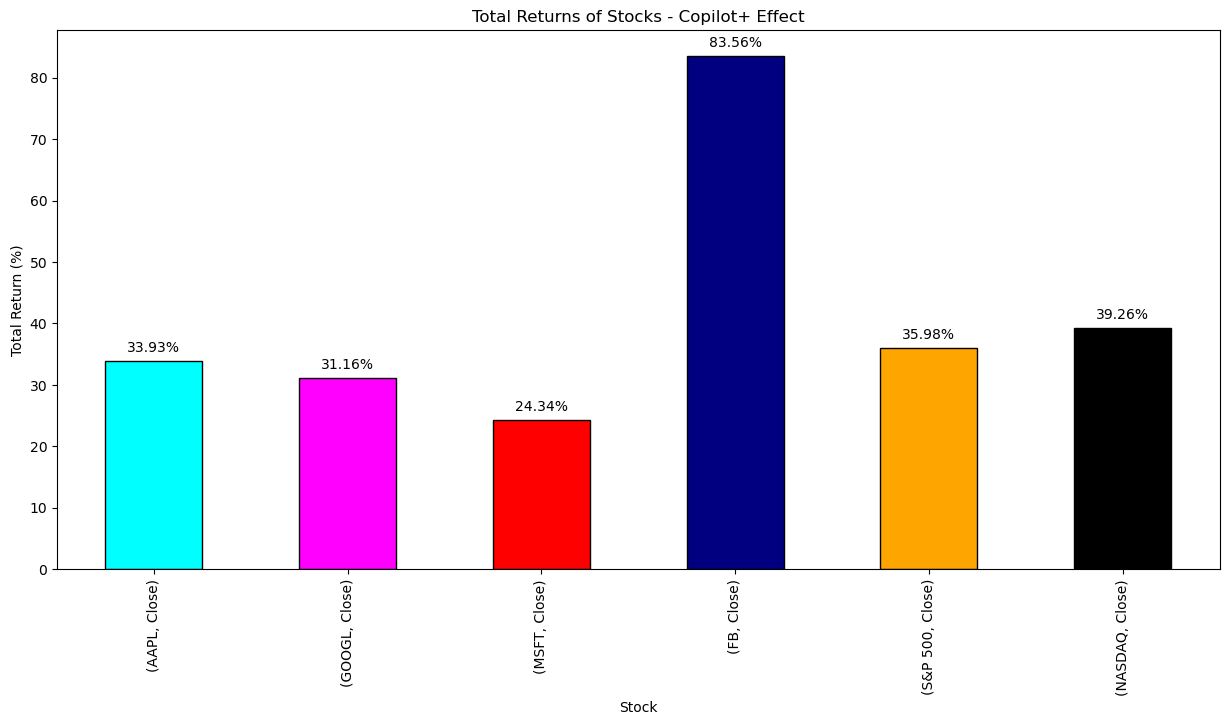

In [44]:
# Histogram of returns since launch of Copilot+ (2023-11-01)
colors = ["cyan", "magenta", "red", "navy", "orange", "black"]
total_returns_AI2.plot(kind="bar", title="Total Returns of Stocks - Copilot+ Effect", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Total Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(total_returns_AI2):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')
plt.show()

In [45]:
# Closing prices of all 4 stocks since 2022-11-30 (launch of ChatGPT by Open AI)
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_AI3 = closing_prices.loc["2022-11-30":"2024-09-30"]
closing_prices_AI3

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2022-11-30,148.029999,100.989998,255.139999,118.099998,4080.11,11468.000000
2022-12-01,148.309998,100.989998,254.690002,120.440002,4076.57,11482.450195
2022-12-02,147.809998,100.440002,255.020004,123.489998,4071.70,11461.500000
2022-12-05,146.630005,99.480003,250.199997,122.430000,3998.84,11239.940430
2022-12-06,142.910004,96.980003,245.119995,114.120003,3941.26,11014.889648
...,...,...,...,...,...,...
2024-09-24,227.369995,162.289993,429.170013,563.330017,5732.93,18074.519531
2024-09-25,226.369995,161.490005,432.109985,568.309998,5722.26,18082.210938


In [46]:
apple_data_AI3 = apple_data.loc['2022-11-30':'2024-10-01']
google_data_AI3 = google_data.loc['2022-11-30':'2024-10-01']
microsoft_data_AI3 = microsoft_data.loc['2022-11-30':'2024-10-01']
facebook_data_AI3 = facebook_data.loc['2022-11-30':'2024-10-01']

In [ ]:
# Closing value of NASDAQ Composite from 2022-11-30 to 2024-10-01
nasdaq_data_AI3 = nasdaq_data.loc['2022-11-30':'2024-10-01']
nasdaq_data_AI3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-30,10995.200195,11468.469727,10966.530273,11468.000000,11468.000000,6653460000
2022-12-01,11475.169922,11546.769531,11378.750000,11482.450195,11482.450195,5158120000
2022-12-02,11308.379883,11492.320312,11296.719727,11461.500000,11461.500000,4523010000
2022-12-05,11380.990234,11425.509766,11193.019531,11239.940430,11239.940430,4510030000
2022-12-06,11228.419922,11241.419922,10956.200195,11014.889648,11014.889648,4713330000
...,...,...,...,...,...,...
2024-09-24,18046.439453,18091.960938,17863.380859,18074.519531,18074.519531,5347580000
2024-09-25,18050.359375,18155.039062,18040.619141,18082.210938,18082.210938,4858060000
2024-09-26,18327.339844,18327.339844,18071.740234,18190.289062,18190.289062,5669210000


In [48]:
# Closing value of S&P 500 index from 2022-11-30 to 2024-10-01
sp500_data_AI3 = sp500_data.loc['2022-11-30':'2024-10-01']
sp500_data_AI3

,Close
Date,
2022-11-30,4080.11
2022-12-01,4076.57
2022-12-02,4071.70
2022-12-05,3998.84
2022-12-06,3941.26
...,...
2024-09-25,5722.26
2024-09-26,5745.37
2024-09-27,5738.17


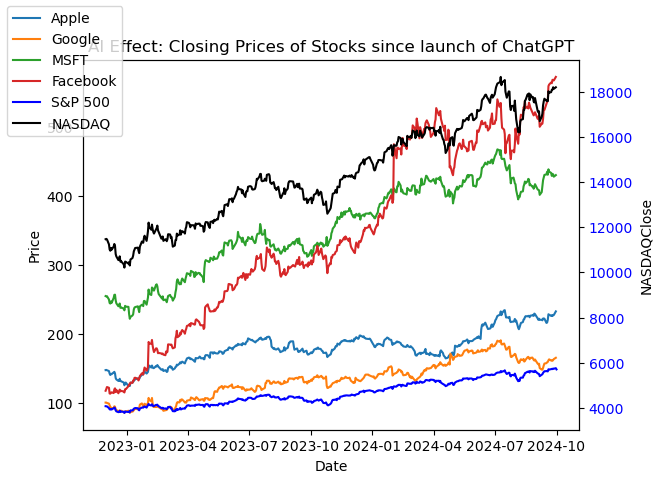

In [49]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the closing prices of the stocks on left y-axis
ax1.plot(apple_data_AI3['Close'], label=["MSFT"])
ax1.plot(google_data_AI3['Close'], label=["Google"])
ax1.plot(microsoft_data_AI3['Close'], label=["Apple"])
ax1.plot(facebook_data_AI3['Close'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis="y")

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()

# Plot the S&P 500 on the right y-axis
ax2.plot(sp500_data_AI3, color="b", label="S&P 500")
ax2.plot(nasdaq_data_AI3['Close'], color="black", label="NASDAQ")
ax2.set_ylabel("S&P500" + "Close", color="b")
ax2.set_ylabel("NASDAQ" + "Close", color="black")
ax2.tick_params(axis="y", labelcolor="b")

# Show the plot
plt.title("AI Effect: Closing Prices of Stocks since launch of ChatGPT")
fig.legend(["Apple", "Google", "MSFT", "Facebook", "S&P 500", "NASDAQ"], loc="upper left")
plt.show()

In [50]:
# Return on all 4 stocks vs S&P 500 since 2022-11-30 (launch of ChatGPT by Open AI)
start_prices = closing_prices_AI3.iloc[0]
end_prices = closing_prices_AI3.iloc[-1]
total_returns_AI3 = ((end_prices - start_prices)/start_prices)*100
total_returns_AI3

AAPL     Close     57.400528
GOOGL    Close     64.224190
MSFT     Close     68.652500
FB       Close    384.707883
S&P 500  Close     41.233447
NASDAQ   Close     58.608039
dtype: float64

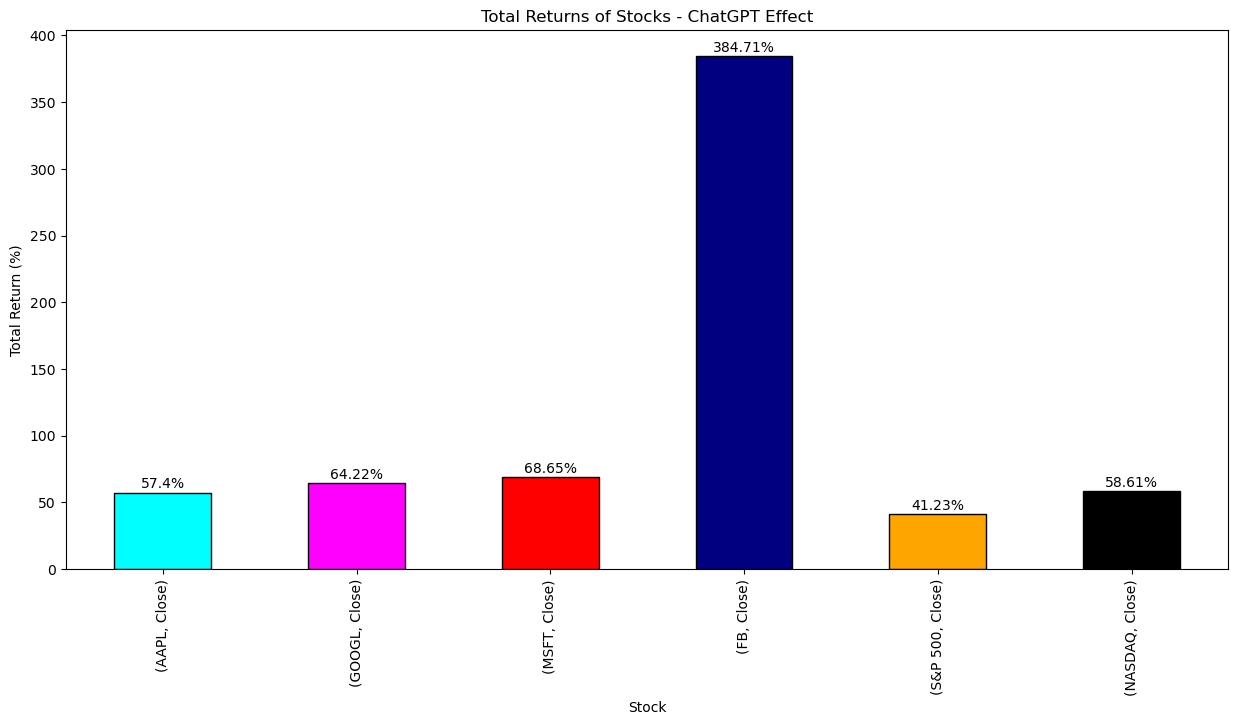

In [51]:
# Histogram of returns since release of ChatGPT (2022-11-30)
colors = ["cyan", "magenta", "red", "navy", "orange", "black"]
total_returns_AI3.plot(kind="bar", title="Total Returns of Stocks - ChatGPT Effect", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Total Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(total_returns_AI3):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')
plt.show()

In [52]:
# Tabulate total returns and annualized from 2018-2024, since launch of Gemini, Copilot+, and ChatGPT
comparative_returns = pd.concat([total_returns, annualized_returns, total_returns_AI3, total_returns_AI, total_returns_AI2], axis=1)
comparative_returns.columns = ["Total Returns", "Annualized Returns", "Total Returns (ChatGPT)", "Total Returns (Gemini)", "Total Returns (Copilot+)"] 
comparative_returns

,,Total Returns,Annualized Returns,Total Returns (ChatGPT),Total Returns (Gemini),Total Returns (Copilot+)
AAPL,Close,441.042627,29.882271,57.400528,41.297761,33.931137
GOOGL,Close,209.072795,21.534390,64.224190,59.886244,31.158569
MSFT,Close,400.639910,28.192786,68.652500,49.254251,24.339000
FB,Close,215.533022,26.201640,384.707883,170.095308,83.562607
S&P 500,Close,113.756904,13.287790,41.233447,40.229868,35.976177
NASDAQ,Close,159.589407,17.043380,58.608039,48.824281,39.258218


In [53]:
# Impact on prices after ChatGPT release
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_chatGPT = closing_prices.loc["2022-11-28":"2022-12-03"]
closing_prices_chatGPT

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2022-11-28,144.220001,96.050003,241.759995,108.779999,3963.94,11049.500000
2022-11-29,141.169998,95.190002,240.330002,109.459999,3957.63,10983.780273
2022-11-30,148.029999,100.989998,255.139999,118.099998,4080.11,11468.000000
2022-12-01,148.309998,100.989998,254.690002,120.440002,4076.57,11482.450195
2022-12-02,147.809998,100.440002,255.020004,123.489998,4071.70,11461.500000


In [54]:
# % change in prices of all 4 stocks on 2022-11-30 as the result of Open AI's release of ChatGPT
f = lambda x: f'{x:.2f}'
closing_price_percent_chatGPT = closing_prices_chatGPT.pct_change()*100
df_closing_price_percent_chatGPT = closing_price_percent_chatGPT.rename(columns={"Close": "% Change"})
df_closing_price_percent_chatGPT = df_closing_price_percent_chatGPT.map(f)
df_closing_price_percent_chatGPT

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,% Change,% Change,% Change,% Change,% Change,% Change
Date,,,,,,
2022-11-28,nan,nan,nan,nan,nan,nan
2022-11-29,-2.11,-0.90,-0.59,0.63,-0.16,-0.59
2022-11-30,4.86,6.09,6.16,7.89,3.09,4.41
2022-12-01,0.19,0.00,-0.18,1.98,-0.09,0.13
2022-12-02,-0.34,-0.54,0.13,2.53,-0.12,-0.18


In [55]:
# Impact on prices after Gemini/Bard release
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_gemini = closing_prices.loc["2023-03-28":"2023-04-03"]
closing_prices_gemini

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2023-03-28,157.649994,101.029999,275.230011,200.679993,3971.27,11716.080078
2023-03-29,160.770004,101.389999,280.510010,205.350006,4027.81,11926.240234
2023-03-30,162.360001,100.889999,284.049988,207.839996,4050.83,12013.469727
2023-03-31,164.899994,103.730003,288.299988,211.940002,4109.31,12221.910156
2023-04-03,166.169998,104.360001,287.230011,213.070007,4124.51,12189.450195


In [56]:
# % change in prices of all 4 stocks on 2023-03-30 as the result of Google's release of Gemini/Bard
f = lambda x: f'{x:.2f}'
closing_price_percent_gemini = closing_prices_gemini.pct_change()*100
df_closing_price_percent_gemini = closing_price_percent_gemini.rename(columns={"Close": "% Change"})
df_closing_price_percent_gemini = df_closing_price_percent_gemini.map(f)
df_closing_price_percent_gemini

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,% Change,% Change,% Change,% Change,% Change,% Change
Date,,,,,,
2023-03-28,nan,nan,nan,nan,nan,nan
2023-03-29,1.98,0.36,1.92,2.33,1.42,1.79
2023-03-30,0.99,-0.49,1.26,1.21,0.57,0.73
2023-03-31,1.56,2.81,1.50,1.97,1.44,1.74
2023-04-03,0.77,0.61,-0.37,0.53,0.37,-0.27


In [57]:
# Impact on prices after Copilot+ release
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_copilot = closing_prices.loc["2023-10-30":"2023-11-03"]
closing_prices_copilot

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2023-10-30,170.289993,124.459999,337.309998,302.660004,4166.82,12789.480469
2023-10-31,170.770004,124.080002,338.109985,301.269989,4193.80,12851.240234
2023-11-01,173.970001,126.449997,346.070007,311.850006,4237.86,13061.469727
2023-11-02,177.570007,127.489998,348.320007,310.869995,4317.78,13294.190430
2023-11-03,176.649994,129.100006,352.799988,314.600006,4358.34,13478.280273


In [58]:
# % change in prices of all 4 stocks on 2023-11-01 as the result of Microsoft's release of Copilot+
f = lambda x: f'{x:.2f}'
closing_price_percent_copilot = closing_prices_copilot.pct_change()*100
df_closing_price_percent_copilot = closing_price_percent_copilot.rename(columns={"Close": "% Change"})
df_closing_price_percent_copilot = df_closing_price_percent_copilot.map(f)
df_closing_price_percent_copilot

,AAPL,GOOGL,MSFT,FB,S&P 500,NASDAQ
,% Change,% Change,% Change,% Change,% Change,% Change
Date,,,,,,
2023-10-30,nan,nan,nan,nan,nan,nan
2023-10-31,0.28,-0.31,0.24,-0.46,0.65,0.48
2023-11-01,1.87,1.91,2.35,3.51,1.05,1.64
2023-11-02,2.07,0.82,0.65,-0.31,1.89,1.78
2023-11-03,-0.52,1.26,1.29,1.20,0.94,1.38


In [59]:
# Create a DataFrame for NASDAQ Composite to include Date and Close columns
df_nasdaq = nasdaq_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})
df_nasdaq

,ds,y
0,2018-01-02,7006.899902
1,2018-01-03,7065.529785
2,2018-01-04,7077.910156
3,2018-01-05,7136.560059
4,2018-01-08,7157.390137
...,...,...
1692,2024-09-24,18074.519531
1693,2024-09-25,18082.210938
1694,2024-09-26,18190.289062
1695,2024-09-27,18119.589844


<Axes: title={'center': 'NASDAQ Composite Index Closing Value'}, xlabel='ds'>

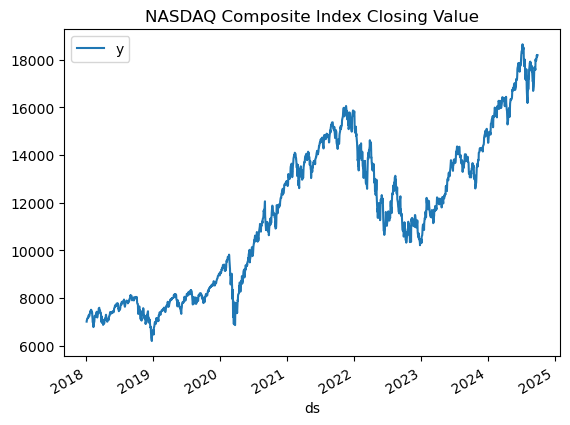

In [60]:
# Plot the NASDAQ Composite dataframe
df_nasdaq.plot(x="ds", y="y", title="NASDAQ Composite Index Closing Value")

In [61]:
# Create a Prophet model for NASDAQ Composite stock index
from prophet import Prophet
model_nasdaq = Prophet()

# Fit the model with NASDAQ Composite data
model_nasdaq.fit(df_nasdaq)

# Forecast for NASDAQ Composite stock index for the next 1 year
future_nasdaq = model_nasdaq.make_future_dataframe(periods=365, freq="D")
future_nasdaq.tail()

Importing plotly failed. Interactive plots will not work.
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:54 - cmdstanpy - INFO - Chain [1] done processing


,ds
2057,2025-09-26
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30


In [62]:
# Make predictions for NASDAQ Composite stock index
forecast_nasdaq = model_nasdaq.predict(future_nasdaq)

# Display the forecast for NASDAQ Composite stock index
forecast_nasdaq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2057,2025-09-26,21742.988978,19659.119279,23744.297741
2058,2025-09-27,21626.925417,19526.442825,23677.753956
2059,2025-09-28,21626.126896,19567.626407,23617.916104
2060,2025-09-29,21744.872896,19542.150000,23793.613157
2061,2025-09-30,21746.832719,19499.968558,23721.524621


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for NASDAQ Composite Stock Index')

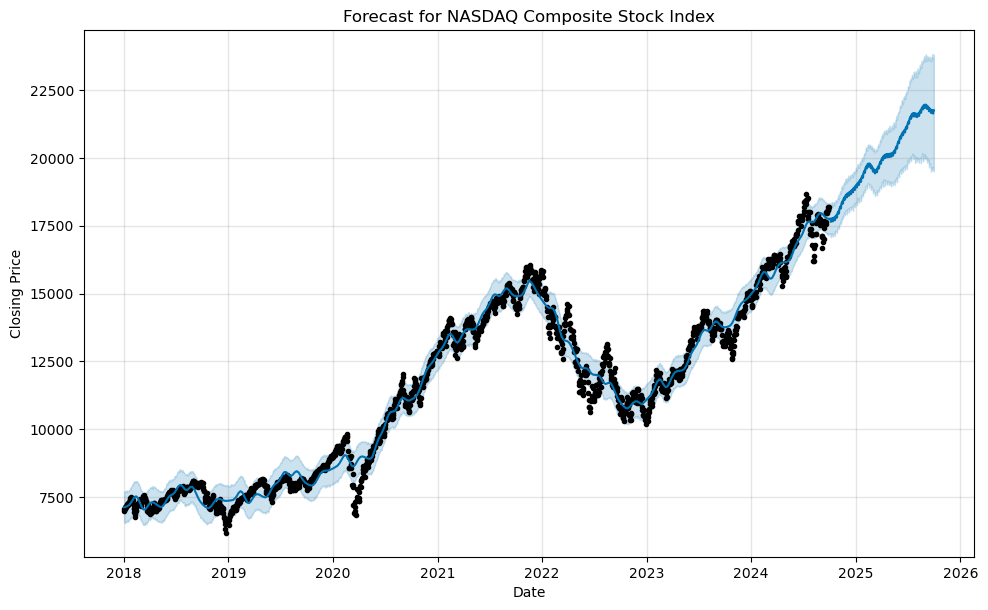

In [63]:
# Plot the forecast for NASDAQ Composite stock index
model_nasdaq.plot(forecast_nasdaq, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for NASDAQ Composite Stock Index")

In [64]:
# Create a Dataframe for S&P 500 to include date and closing price
df_sp500 = sp500_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Review the S&P 500 dataframe
df_sp500


,ds,y
0,2018-01-02,2695.81
1,2018-01-03,2713.06
2,2018-01-04,2723.99
3,2018-01-05,2743.15
4,2018-01-08,2747.71
...,...,...
1693,2024-09-25,5722.26
1694,2024-09-26,5745.37
1695,2024-09-27,5738.17
1696,2024-09-30,5762.48


<Axes: title={'center': 'S&P 500 Index Closing Value'}, xlabel='ds'>

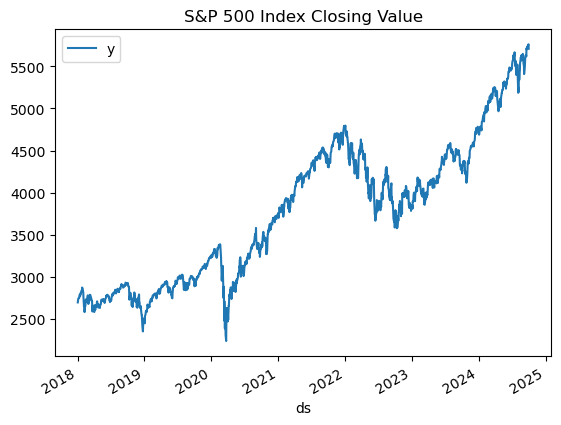

In [65]:
# Plot the S&P 500 dataframe
df_sp500.plot(x="ds", y="y", title="S&P 500 Index Closing Value")

In [66]:
# Create a Prophet model for S&P 500 stock index
from prophet import Prophet
model_sp500 = Prophet()

# Fit the model with S&P 500 data
model_sp500.fit(df_sp500)

# Forecast for S&P 500 stock index for the next 1 year
future_sp500 = model_sp500.make_future_dataframe(periods=365, freq="D")
future_sp500.tail()

09:25:57 - cmdstanpy - INFO - Chain [1] start processing
09:25:58 - cmdstanpy - INFO - Chain [1] done processing


,ds
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30
2062,2025-10-01


In [67]:
# Make predictions for S&P 500 stock index
forecast_sp500 = model_sp500.predict(future_sp500)

# Display the forecast for S&P 500 stock index
forecast_sp500[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2058,2025-09-27,6666.454792,6026.013147,7373.050657
2059,2025-09-28,6664.667797,6032.176089,7405.772229
2060,2025-09-29,6664.938257,6014.195092,7408.907243
2061,2025-09-30,6663.868243,6012.498067,7371.459864
2062,2025-10-01,6660.255579,6028.061257,7389.322718


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for S&P 500 Stock Index')

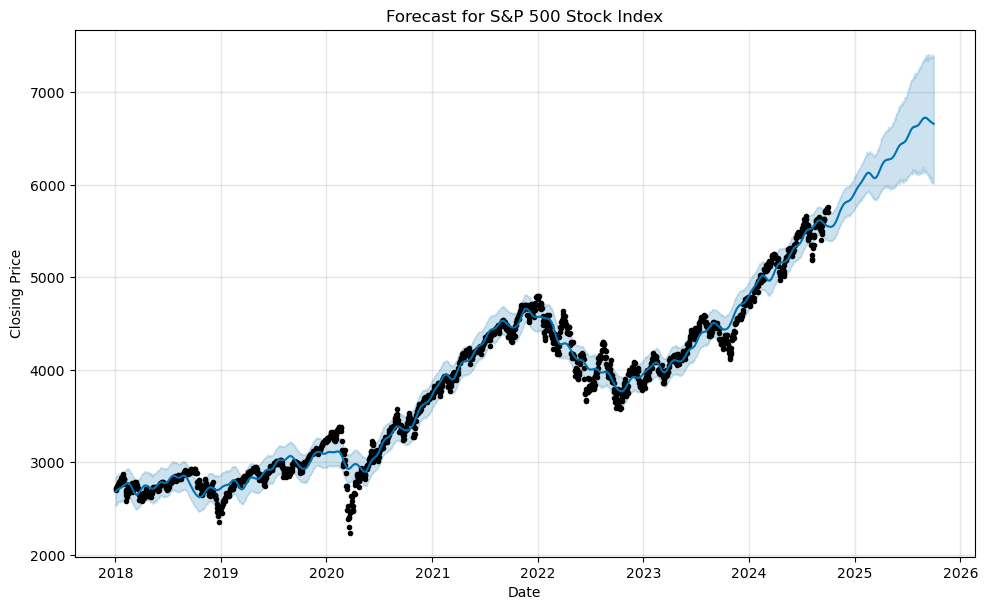

In [68]:
# Plot the forecast for S&P 500 stock index
model_sp500.plot(forecast_sp500, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for S&P 500 Stock Index")


In [69]:
# Create a Dataframe for AAPL to include date and closing price
df_apple = apple_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Review the Apple dataframe
df_apple


,ds,y
0,2018-01-02,43.064999
1,2018-01-03,43.057499
2,2018-01-04,43.257500
3,2018-01-05,43.750000
4,2018-01-08,43.587502
...,...,...
1692,2024-09-24,227.369995
1693,2024-09-25,226.369995
1694,2024-09-26,227.520004
1695,2024-09-27,227.789993


In [70]:
# Create a Prophet model for Apple stock price
from prophet import Prophet
model_apple = Prophet()

# Fit the model with Apple data
model_apple.fit(df_apple)

# Forecast for Apple stock price for the next 1 year
future_apple = model_apple.make_future_dataframe(periods=365, freq="D")
future_apple.tail()

09:26:00 - cmdstanpy - INFO - Chain [1] start processing
09:26:01 - cmdstanpy - INFO - Chain [1] done processing


,ds
2057,2025-09-26
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30


In [71]:
# Make predictions for Apple stock iprice
forecast_apple = model_apple.predict(future_apple)

# Display the forecast for Apple stock price
forecast_apple[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2057,2025-09-26,240.490175,212.540858,267.255821
2058,2025-09-27,237.939116,208.224729,263.464803
2059,2025-09-28,237.879386,208.626544,264.301462
2060,2025-09-29,240.463865,209.971503,266.755144
2061,2025-09-30,240.334609,211.155867,267.256148


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for Apple Stock Price')

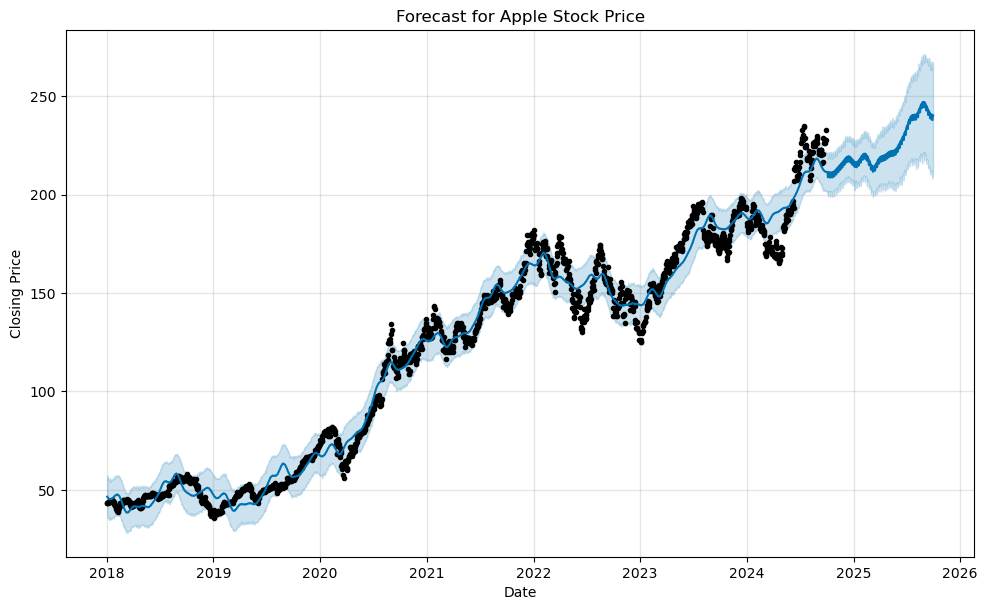

In [72]:
# Plot the forecast for Apple stock price
model_apple.plot(forecast_apple, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for Apple Stock Price")

In [73]:
# Create a Dataframe for Google to include date and closing price
df_google = google_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Review the Google dataframe
df_google


,ds,y
0,2018-01-02,53.660500
1,2018-01-03,54.576000
2,2018-01-04,54.787998
3,2018-01-05,55.514500
4,2018-01-08,55.710499
...,...,...
1692,2024-09-24,162.289993
1693,2024-09-25,161.490005
1694,2024-09-26,162.729996
1695,2024-09-27,163.949997


In [74]:
# Create a Prophet model for Google stock price
from prophet import Prophet
model_google = Prophet()

# Fit the model with Google data
model_google.fit(df_google)

# Forecast for Google stock price for the next 1 year
future_google = model_google.make_future_dataframe(periods=365, freq="D")
future_google.tail()

09:26:03 - cmdstanpy - INFO - Chain [1] start processing
09:26:04 - cmdstanpy - INFO - Chain [1] done processing


,ds
2057,2025-09-26
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30


In [75]:
# Make predictions for Google stock price
forecast_google = model_google.predict(future_google)

# Display the forecast for Google stock price
forecast_google[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2057,2025-09-26,218.829413,195.157090,244.562315
2058,2025-09-27,217.354968,193.926122,243.537790
2059,2025-09-28,217.572724,193.858004,243.638986
2060,2025-09-29,219.356812,195.435173,245.544654
2061,2025-09-30,219.615082,195.703484,244.683514


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for Google Stock Price')

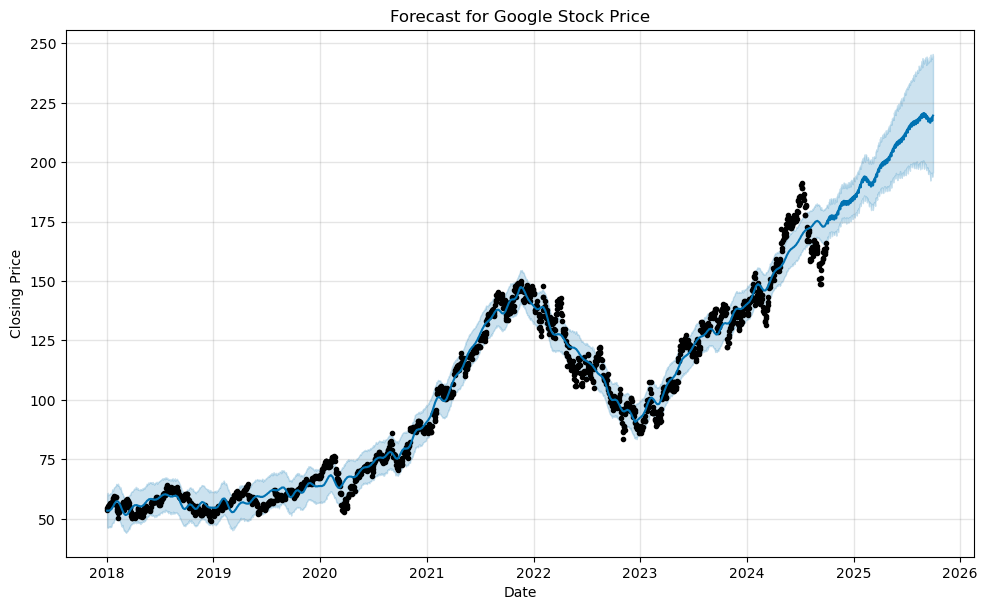

In [76]:
# Plot the forecast for Google stock price
model_google.plot(forecast_google, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for Google Stock Price")

In [77]:
# Create a Dataframe for Microsoft to include date and closing price
df_microsoft = microsoft_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Review the Microsoft dataframe
df_microsoft

,ds,y
0,2018-01-02,85.949997
1,2018-01-03,86.349998
2,2018-01-04,87.110001
3,2018-01-05,88.190002
4,2018-01-08,88.279999
...,...,...
1692,2024-09-24,429.170013
1693,2024-09-25,432.109985
1694,2024-09-26,431.309998
1695,2024-09-27,428.019989


In [78]:
# Create a Prophet model for Microsoft stock price
from prophet import Prophet
model_microsoft = Prophet()

# Fit the model with Microsoft data
model_microsoft.fit(df_microsoft)

# Forecast for Microsoft stock price for the next 1 year
future_microsoft = model_microsoft.make_future_dataframe(periods=365, freq="D")
future_microsoft.tail()

09:26:06 - cmdstanpy - INFO - Chain [1] start processing
09:26:08 - cmdstanpy - INFO - Chain [1] done processing


,ds
2057,2025-09-26
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30


In [79]:
# Make predictions for Microsoft stock price
forecast_microsoft = model_microsoft.predict(future_microsoft)

# Display the forecast for Microsoft's stock price
forecast_microsoft[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2057,2025-09-26,544.383161,480.401022,608.287936
2058,2025-09-27,543.799576,480.085694,612.210297
2059,2025-09-28,544.034505,478.009538,608.009259
2060,2025-09-29,544.811864,481.412870,609.220155
2061,2025-09-30,545.023867,480.775270,610.321930


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for Microsoft Stock Price')

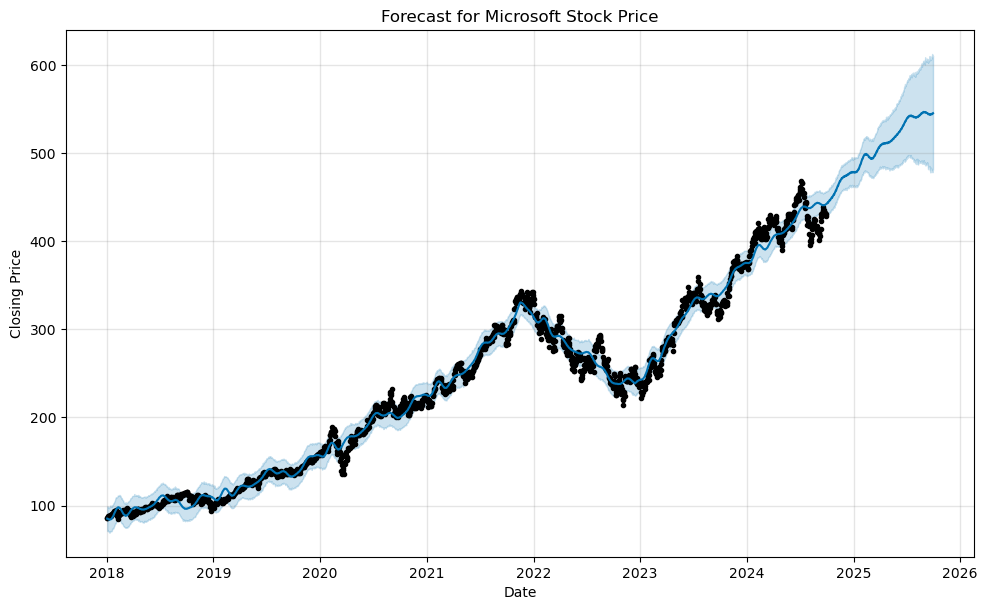

In [80]:
# Plot the forecast for Microsoft stock price
model_microsoft.plot(forecast_microsoft, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for Microsoft Stock Price")

In [81]:
# Create a Dataframe for Facebook/META to include date and closing price
df_facebook = facebook_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Review the Facebook/META dataframe
df_facebook

,ds,y
0,2018-01-02,181.419998
1,2018-01-03,184.669998
2,2018-01-04,184.330002
3,2018-01-05,186.850006
4,2018-01-08,188.279999
...,...,...
1692,2024-09-24,563.330017
1693,2024-09-25,568.309998
1694,2024-09-26,567.840027
1695,2024-09-27,567.359985


In [82]:
# Create a Prophet model for Facebook/META stock price
from prophet import Prophet
model_facebook = Prophet()

# Fit the model with Facebook/META data
model_facebook.fit(df_facebook)

# Forecast for Facebook/META stock index for the next 1 year
future_facebook = model_facebook.make_future_dataframe(periods=365, freq="D")
future_facebook.tail()

09:26:09 - cmdstanpy - INFO - Chain [1] start processing
09:26:10 - cmdstanpy - INFO - Chain [1] done processing


,ds
2057,2025-09-26
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30


In [83]:
# Make predictions for Facebook/META stock price
forecast_facebook = model_facebook.predict(future_facebook)

# Display the forecast for Facebook/META stock price
forecast_facebook[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2057,2025-09-26,791.074678,707.951404,868.555463
2058,2025-09-27,788.409319,703.304004,868.495982
2059,2025-09-28,788.930097,706.138892,869.768934
2060,2025-09-29,792.640279,705.147595,868.997947
2061,2025-09-30,793.140245,708.281969,869.880279


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for Facebook/META Stock Price')

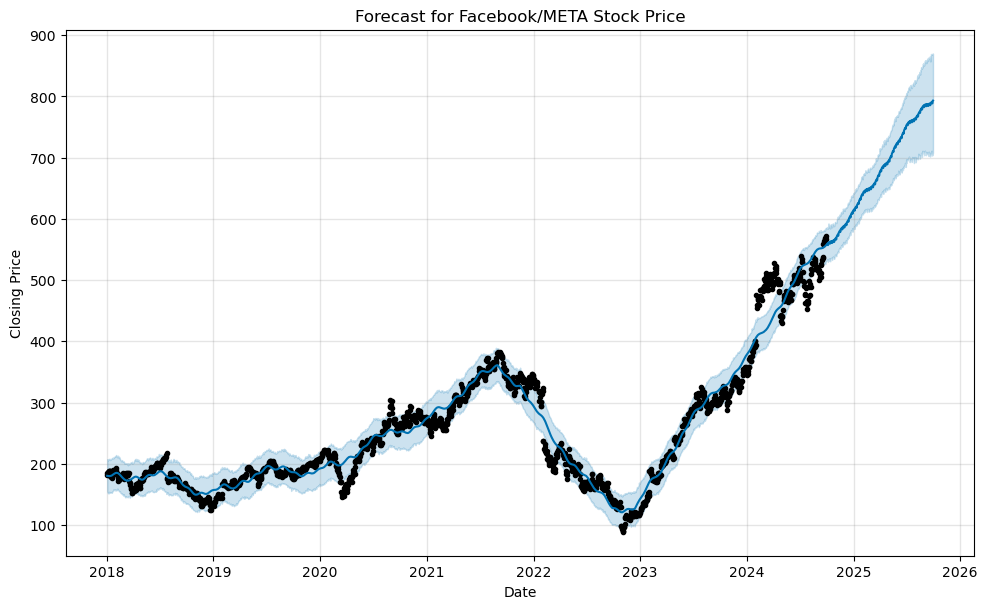

In [84]:
# Plot the forecast for Facebook/META stock price
model_facebook.plot(forecast_facebook, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for Facebook/META Stock Price")

In [85]:
# Average Daily trading volume of all 4 stocks since 2018-01-01 in millions of shares
volumes = joined_data_cols.loc[:, pd.IndexSlice[:, "Volume"]]
volumes

,AAPL,GOOGL,MSFT,FB,NASDAQ
,Volume,Volume,Volume,Volume,Volume
Date,,,,,
2018-01-02,102223600,31766000,22483800,18151900,1929700000
2018-01-03,118071600,31318000,26061400,16886600,2173130000
2018-01-04,89738400,26052000,21912000,13880900,2103220000
2018-01-05,94640000,30250000,23407100,13574500,2024000000
2018-01-08,82271200,24644000,22113000,17994700,2055010000
...,...,...,...,...,...
2024-09-24,43556100,23332100,17015800,12993000,5347580000
2024-09-25,42308700,18869200,13396400,16543400,4858060000


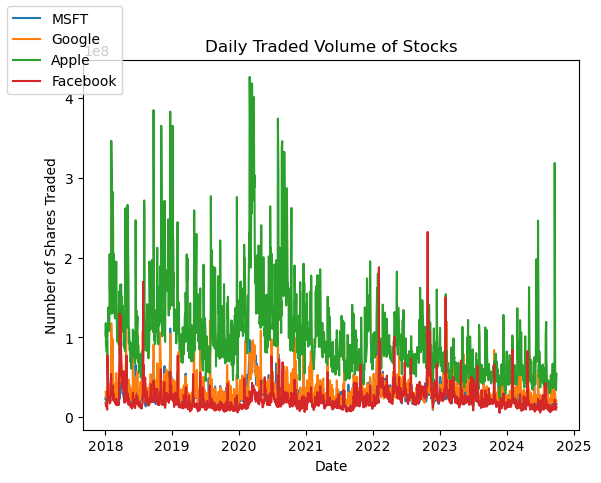

In [86]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the daily volume of the stocks on left y-axis
ax1.plot(microsoft_data_2018_2024['Volume'], label=["MSFT"])
ax1.plot(google_data_2018_2024['Volume'], label=["Google"])
ax1.plot(apple_data_2018_2024['Volume'], label=["Apple"])
ax1.plot(facebook_data_2018_2024['Volume'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Shares Traded")
ax1.tick_params(axis="y")

# Show the plot
plt.title("Daily Traded Volume of Stocks")
fig.legend(["MSFT", "Google", "Apple", "Facebook"], loc="upper left")
plt.show()

In [87]:
# Trading volume of all 4 stocks on 2022-11-30 (ChatGPT)
volumes_chatGPT = volumes.loc["2022-11-29":"2022-12-01"]
volumes_chatGPT

,AAPL,GOOGL,MSFT,FB,NASDAQ
,Volume,Volume,Volume,Volume,Volume
Date,,,,,
2022-11-29,83763800,20061700,17956300,23899200,4592830000
2022-11-30,111380900,43647500,47594200,43348600,6653460000
2022-12-01,71250400,28687100,26041500,36551400,5158120000


In [88]:
# % change in trading volume of all 4 stocks on 2022-11-30 as the result of Open AI's release of ChatGPT 
# Rename columns from Volume to % change
# Report number to 2 decimal places
f = lambda x: f'{x:.2f}'
volumes_chatGPT_change = volumes_chatGPT.pct_change()*100
df_volumes_chatGPT_change = volumes_chatGPT_change.rename(columns={"Volume": "% Change"})
df_volumes_chatGPT_change = df_volumes_chatGPT_change.map(f)
df_volumes_chatGPT_change

,AAPL,GOOGL,MSFT,FB,NASDAQ
,% Change,% Change,% Change,% Change,% Change
Date,,,,,
2022-11-29,nan,nan,nan,nan,nan
2022-11-30,32.97,117.57,165.06,81.38,44.87
2022-12-01,-36.03,-34.28,-45.28,-15.68,-22.47


In [89]:
# Trading volume of all 4 stocks on 2023-03-30 (Gemini)
volumes_gemini = volumes.loc["2023-03-30":"2023-04-03"]
volumes_gemini

,AAPL,GOOGL,MSFT,FB,NASDAQ
,Volume,Volume,Volume,Volume,Volume
Date,,,,,
2023-03-30,49501700,33086200,25053400,22608300,4738880000
2023-03-31,68749800,36863400,32766000,25440300,5521150000
2023-04-03,56976200,25035400,24883300,17924600,4816440000


In [90]:
# % change in trading volume of all 4 stocks on 2023-03-30 as the result of Google's release of Gemini/Bard
f = lambda x: f'{x:.2f}'
volumes_gemini_change = volumes_gemini.pct_change()*100
df_volumes_gemini_change = volumes_gemini_change.rename(columns={"Volume": "% Change"})
df_volumes_gemini_change = df_volumes_gemini_change.map(f)
df_volumes_gemini_change


,AAPL,GOOGL,MSFT,FB,NASDAQ
,% Change,% Change,% Change,% Change,% Change
Date,,,,,
2023-03-30,nan,nan,nan,nan,nan
2023-03-31,38.88,11.42,30.78,12.53,16.51
2023-04-03,-17.13,-32.09,-24.06,-29.54,-12.76


In [91]:
# Trading volume of all 4 stocks on 2023-11-01 (Copilot+)
volumes_copilot = volumes.loc["2023-10-31":"2023-11-02"]
volumes_copilot

,AAPL,GOOGL,MSFT,FB,NASDAQ
,Volume,Volume,Volume,Volume,Volume
Date,,,,,
2023-10-31,44846000,26292300,20265300,19434200,4315630000
2023-11-01,56934900,30082400,28158800,20434600,4545120000
2023-11-02,77334800,27124600,24348100,21631800,4962950000


In [92]:
# % change in trading volume of all 4 stocks on 2023-11-01 as the result of Microsoft's release of Copilot+
f = lambda x: f'{x:.2f}'
volumes_copilot_change = volumes_copilot.pct_change()*100
df_volumes_copilot_change = volumes_copilot_change.rename(columns={"Volume": "% Change"})
df_volumes_copilot_change = df_volumes_copilot_change.map(f)
df_volumes_copilot_change


,AAPL,GOOGL,MSFT,FB,NASDAQ
,% Change,% Change,% Change,% Change,% Change
Date,,,,,
2023-10-31,nan,nan,nan,nan,nan
2023-11-01,26.96,14.42,38.95,5.15,5.32
2023-11-02,35.83,-9.83,-13.53,5.86,9.19
